## Fresnel Transfer Function Approach

1. Given wavelength ($\lambda$),z, and the largest width of the aperture $l$, calculate the Fresnel Number $N_f$ appropriate for the entire aperture.
2. Choose an acceptable level of aliasing at the edge of the diffraction pattern.
3. Start by assuming that the aperture is rectangular, even though it may not be. Choose M, Q, and N=QM based on Figure 5.5
4. Create the padded aperture array of size NxN centered at index (N/2, N/2)
5. Create the quadratic-phase exponential transfer function array of length NxN, centered at index (N/2, N/2)
6. Perform a DFT on the aperture array, using an FFT algorithm. Center the result at index (N/2, N/2)
7. Multiply the two spectral arrays together element by element and perform an inverse DFT on the product, again using the FFT algorithm.
8. Circularly shift the center of the resulting sequence from indices (0,0) to indicies (N/2, N/2)
9. If intensity is of interest, take the squared magnitude of each element in the result of the inverse DFT. 
10. Experiment by increasing or decreasing M to determine its minimum allowable value that will satisfy the aliasing criterion. Choose Q=M/(4Nf) and adjust this value if necessary to yield good results.

In [34]:
#Import some packages that we will need
import torch
import matplotlib.pyplot as plt
%matplotlib ipympl

In [35]:
#First, lets define our units
cm = 1e-2
mm = 1e-3
um = 1e-6
nm = 1e-9
#A small constant for us to use if needed
eps = nm

In [36]:
#Now let's define our aperture width, our wavelength, and our propagation distance
l = 5*mm
wavelength = 500*nm
z = 10*cm

In [37]:
#1) Find our Fresnel Number
N_f = ( (l/2)**2 ) / (wavelength * z)
assert N_f > 0.25 #Make sure we are in the Fresnel region

In [38]:
#2) Choose acceptable aliasing
aliasing_error = 1e-3 #Pretty arbitrary, should experiment with this

In [43]:
#3) M, Q, N
M = 1e3 #User defined parameter. Bigger = better but with more computation
assert M > 4*N_f

Q = M / (4*N_f)

L = wavelength * z * M / l

N = Q * M

dx = l / M
dy = dx



In [44]:
#4) Create the NxN padded aperture array centered at (N/2, N/2)
x_ = torch.linspace(0, N, steps=int(N))
y_ = torch.linspace(0, N, steps=int(N))
xx,yy = torch.meshgrid(x_,y_, indexing='xy')

In [45]:
#5) Create the quadratic-phase exponential array
z = torch.sin(torch.sqrt((xx)**2 + yy**2))

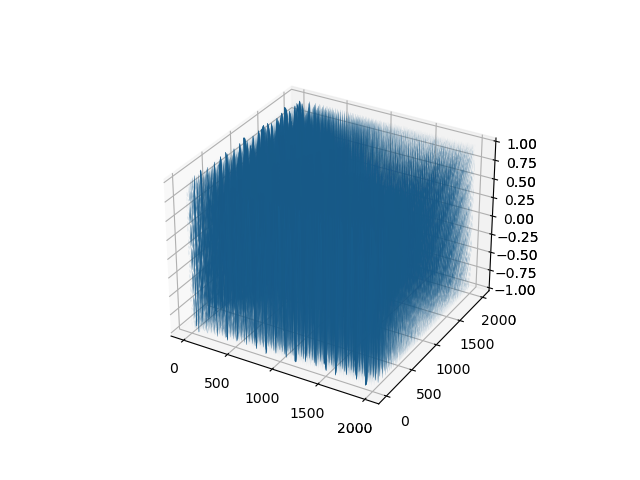

In [46]:
ax = plt.axes(projection='3d')
ax.plot_surface(xx.numpy(), yy.numpy(), z.numpy())
plt.show()